# Census Income
This is a Sci-Kit Learn + Pandas example of classification problem. The dataset comes from http://archive.ics.uci.edu/. 

Data extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)). The data was also preprocessed for the purpose of this example.

Prediction task is to determine whether a person makes over 50K a year.


### List of attributes:

##### Features
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



##### Labels
- income - >50K, <=50K. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
# Uncomment this if you are using Google Colab
!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv

--2020-11-18 11:05:45--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LogisticRegressionCensus/census.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3152687 (3.0M) [text/plain]
Saving to: ‘census.csv.3’

census.csv.3        100%[===================>]   3.01M  18.3MB/s    in 0.2s    

2020-11-18 11:05:46 (18.3 MB/s) - ‘census.csv.3’ saved [3152687/3152687]



### Load dataset

In [ ]:
df = pd.read_csv("./census.csv")

print (df.shape)
print (df.columns)
df.head()

(32561, 12)
Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


## Task 1 - Initial analysis
Perform initial analysis to understand the data.

In [ ]:
df.isnull().sum() 
#There are no null values in the data frame

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
income            0
dtype: int64

income
<=50K    24720
>50K      7841
dtype: int64


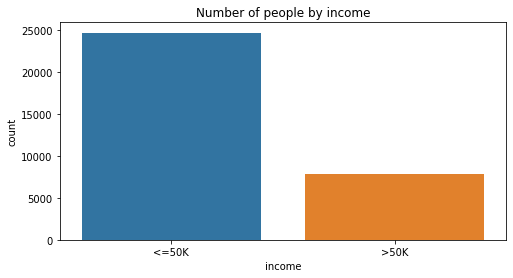

In [ ]:
#Explore income column
print(df.value_counts('income'))

plt.subplots(figsize=(8,4))
sns.countplot(x='income',data=df).set_title('Number of people by income')
plt.show()

#Conclusion: People earning 50k or less a year are slightly more than 3 times more.

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Length: 73, dtype: int64


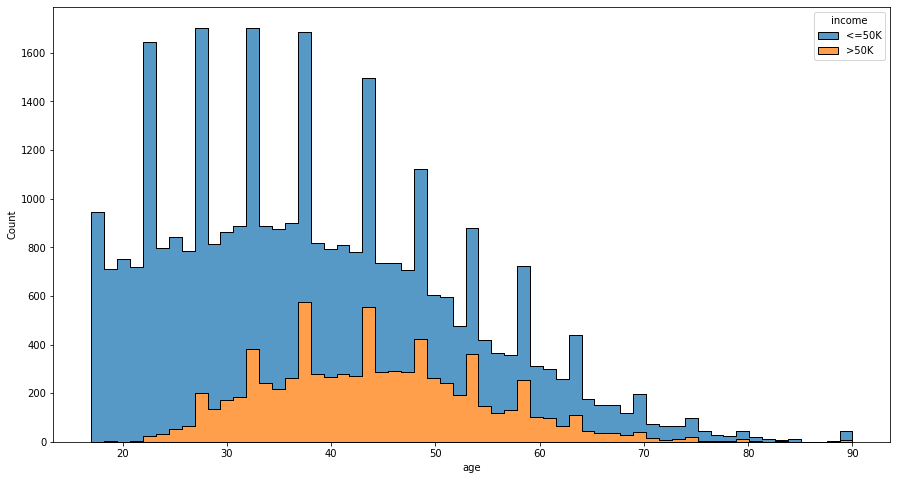

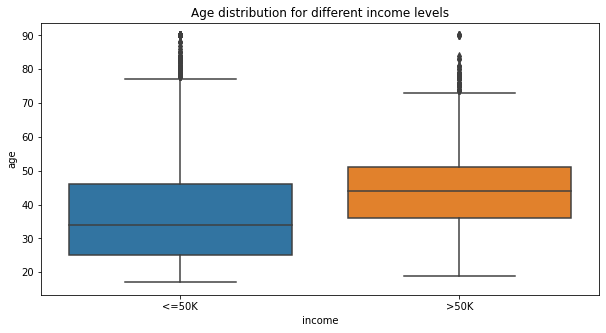

In [ ]:
#Explore age column
print(df.value_counts('age'))

plt.subplots(figsize=(15,8))
sns.histplot(x='age', hue="income",multiple="stack",element="step",data=df)
plt.show()

plt.subplots(figsize=(10,5))
sns.boxplot(y='age',x='income',data=df).set_title("Age distribution for different income levels")
plt.show()

#Conclusion: Most of the working people are between the ages of 25 and 65.
#            In the box plot, you can see that people under 30 are earning less or 50k a year, people over 40 years earning over 50k per year.
#            It can be assumed that experience means higher earnings.

sex
Male      21790
Female    10771
dtype: int64


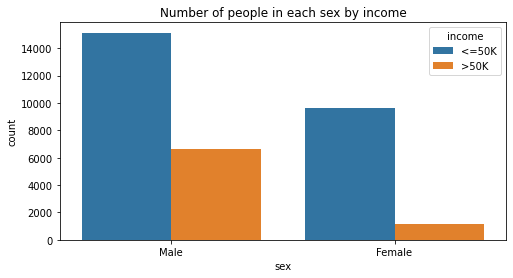

In [ ]:
#Explore sex column
print(df.value_counts('sex'))

plt.subplots(figsize=(8,4))
sns.countplot(x='sex', hue="income",data=df).set_title('Number of people in each sex by income')
plt.show()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
dtype: int64


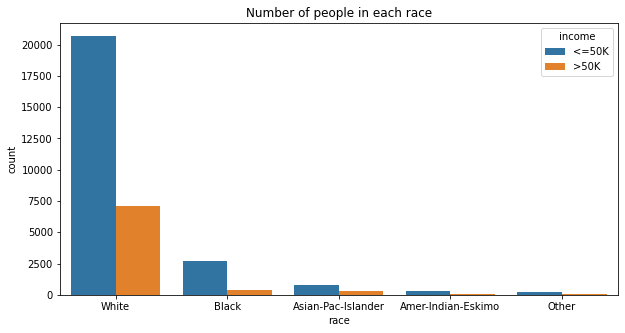

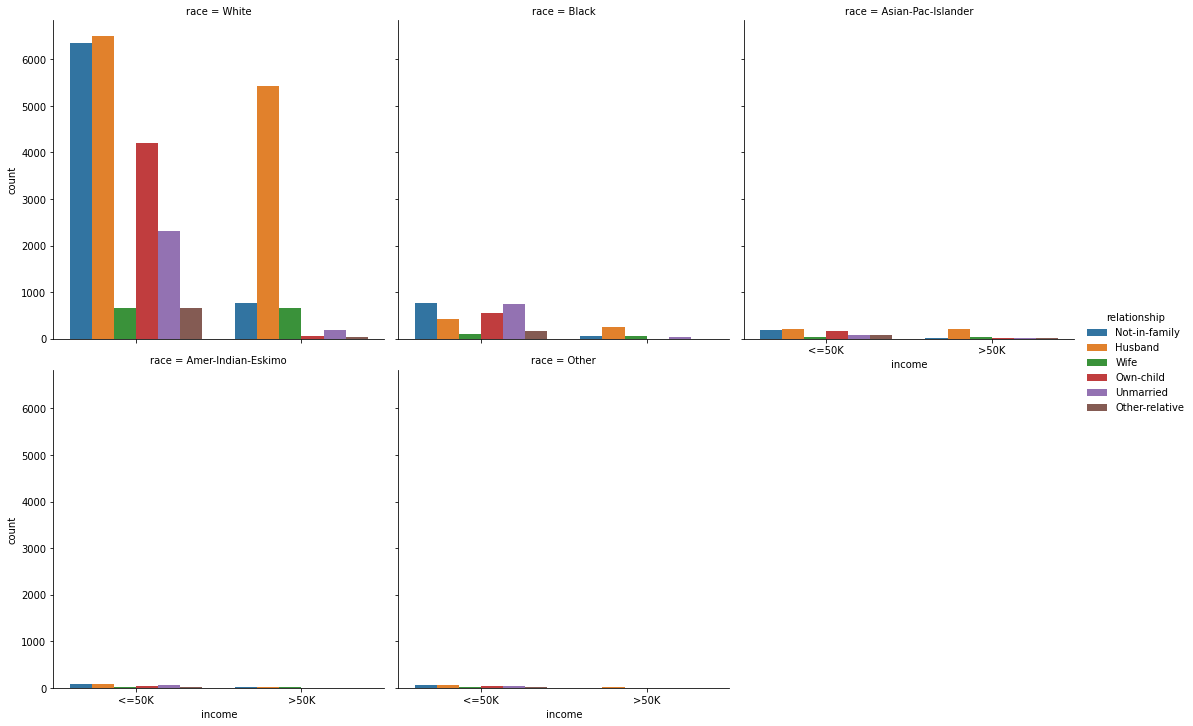

In [ ]:
#Explore race and relationship column
print(df.value_counts('race'))

plt.subplots(figsize=(10,5))
sns.countplot(x='race',hue='income',data=df).set_title('Number of people in each race')
sns.catplot(x='income', hue='relationship', col='race', data=df, kind='count', col_wrap=3)
plt.show()

#Conslusion: White workers are the most numerous and they mostly exceed 50k a year.
#            Most of them are married workers

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
dtype: int64

AFTER AGREGATE
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1857
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
dtype: int64


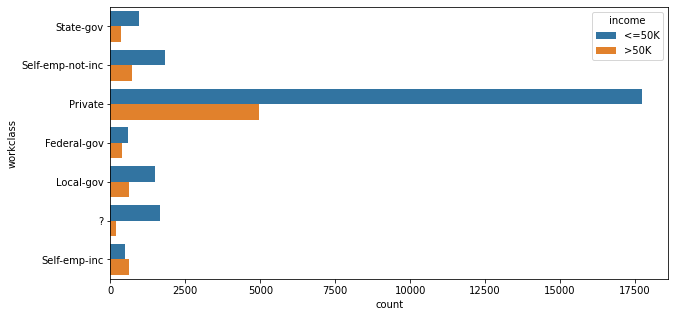

In [ ]:
#Explore workclass column
print(df.value_counts('workclass'))

#Aggregate rare classes
df.workclass = df.workclass.replace({'Without-pay':'?'})
df.workclass = df.workclass.replace({'Never-worked':'?'})
print("\nAFTER AGREGATE\n",df.value_counts('workclass'))

plt.subplots(figsize=(10,5))
#sns.histplot(x='workclass', hue='income', multiple="stack", shrink=.5,data=df).set_title('Number of people working in each category')
sns.countplot(y='workclass', hue='income', data = df)
plt.show()


occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64


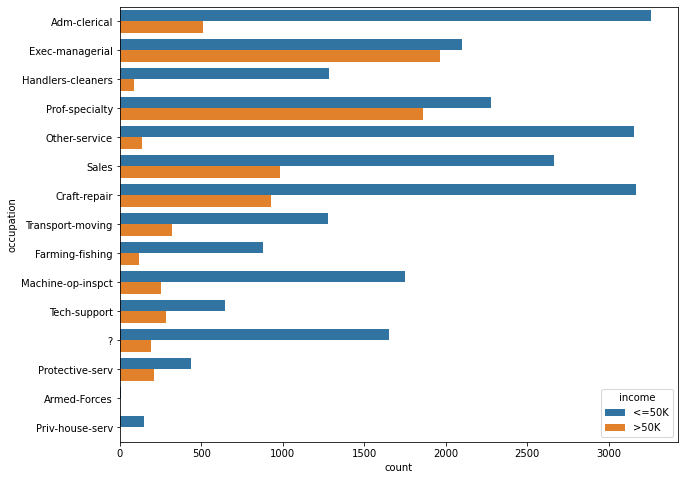

In [ ]:
#Explore occupation column
print(df.value_counts('occupation'))

plt.subplots(figsize=(10,8))
sns.countplot(y='occupation', hue='income', data = df)
plt.show()

#Conclusion: Higher skills do not always mean higher earnings. There is a large percentage of "lower level" people earning over 50k a year

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


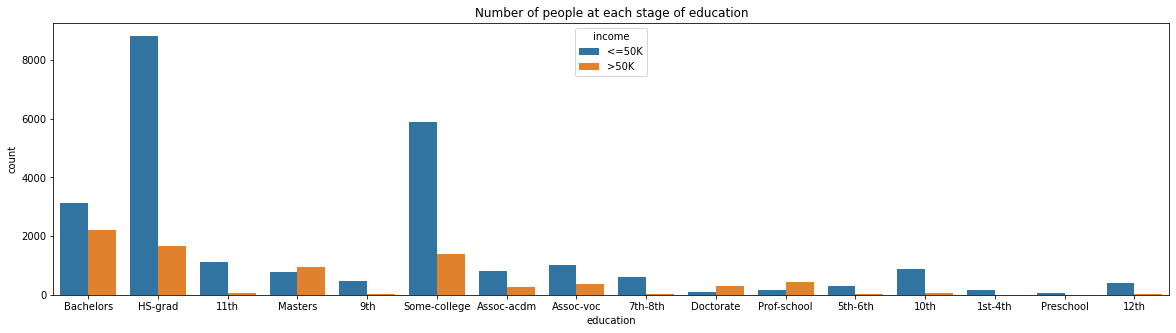

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
dtype: int64


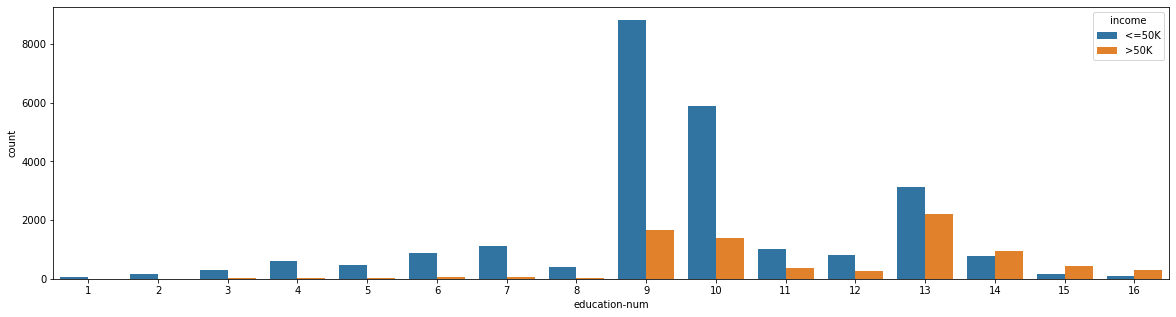

In [ ]:
#Explore education column
print(df.education.value_counts())

plt.subplots(figsize=(20,5))
sns.countplot(x='education', hue='income',data=df).set_title('Number of people at each stage of education')
plt.show()


print(df.value_counts('education-num'))
plt.subplots(figsize=(20,5))
sns.countplot(x='education-num', hue='income',data=df)
plt.show()

#Conclusion: Both of these columns store the same information ie the education of the person.
#            The number of graduates earning more than 50k a year is greater than the number of people in high school.
#            There are also more of them than masters or doctorates.

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
dtype: int64


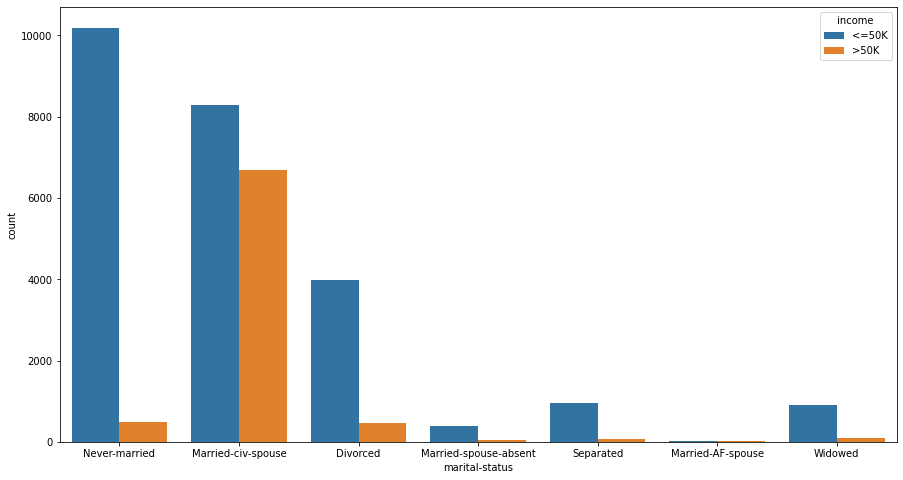

In [ ]:
#Explore marital status	column
print(df.value_counts('marital-status'))

plt.subplots(figsize=(15,8))
sns.countplot(x='marital-status', hue='income', data=df)
plt.show()

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
74        1
87        1
92        1
94        1
82        1
Length: 94, dtype: int64


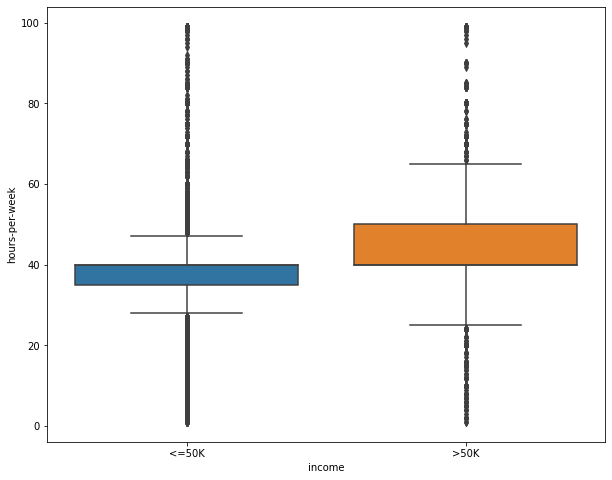

In [ ]:
#Explore hours per week column
print(df.value_counts('hours-per-week'))

plt.subplots(figsize=(10,8))
sns.boxplot(y='hours-per-week',x='income',data=df)
plt.show()

#Conclusion: People who spend more time in the workplace earn more.

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

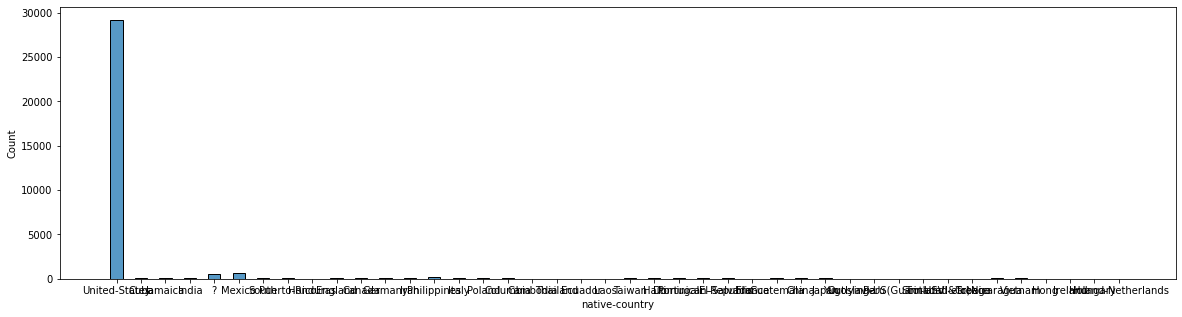

In [ ]:
#Explore native country column
print(df.value_counts('native-country'))
print(df.head())

plt.subplots(figsize=(20,5))
sns.histplot(x='native-country',shrink=.5,data=df)
plt.show()

#Conclusion: Most of the people are from the US, and only a few are from the non-US

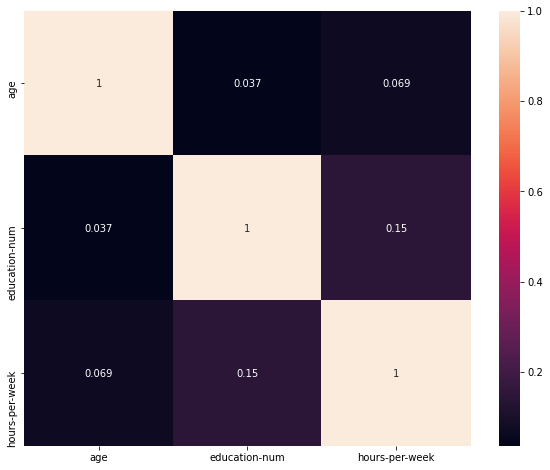

In [ ]:
corr = df.corr()

plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
            annot=True)

In [ ]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,education-num,hours-per-week
age,1.00,0.04,0.07
education-num,0.04,1.00,0.15
hours-per-week,0.07,0.15,1.00


## Task 2 - Preparing data
- Select features `X` and labels `y`. Make sure that your selection makes sense.
- Change the data into a numerical form to let your algorithm (logistic regression) deal with them
- Perform One-hot encoding if necessary
- Split your data into train and test subsets. Make sure that your split is reasonable. Use `stratify` if you consider it helpful.

In [ ]:
#######################
# DATA PRE-PROCESSING #
#######################

#Convert 'income'
income_dummies = pd.get_dummies(df['income'], prefix='income', drop_first=True)
df = pd.concat([df, income_dummies], axis=1)
del df['income']

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income_>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
#Convert countries other than US to "Not United States"

df.loc[df['native-country'] != 'United-States','native-country'] = 'Not-United-States'

country_dummies = pd.get_dummies(df['native-country'], prefix='native-country', drop_first=True)
df = pd.concat([df,country_dummies], axis=1)
del df['native-country']


df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,income_>50K,native-country_United-States
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0,0


In [ ]:
#Convert sex
sex_dummies = pd.get_dummies(df['sex'], prefix='gender', drop_first=True)
df = pd.concat([df,sex_dummies], axis=1)
del df['sex']

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,hours-per-week,income_>50K,native-country_United-States,gender_Male
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,40,0,1,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,13,0,1,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,40,0,1,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,40,0,1,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,40,0,0,0


In [ ]:
#Convert race
df.loc[df['race'] != 'White','race'] = 'Non-White'

race_dummies = pd.get_dummies(df['race'],prefix='race', drop_first=True)
df = pd.concat([df,race_dummies], axis=1)
del df['race']

df.head()


,age,workclass,education,education-num,marital-status,occupation,relationship,hours-per-week,income_>50K,native-country_United-States,gender_Male,race_White
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,40,0,1,1,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,13,0,1,1,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,40,0,1,1,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,40,0,1,1,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,40,0,0,0,0


In [ ]:
#Convert occupation

#Add a rare occupation Armed-Forces (9) to Protective-Service
df.loc[df['occupation'] == 'Armed-Forces', 'occupation'] = 'Protective-serv'

occupation_dummies = pd.get_dummies(df['occupation'],prefix='occupation', drop_first=True)
df = pd.concat([df, occupation_dummies], axis=1)
del df['occupation']

df.head()

,age,workclass,education,education-num,marital-status,relationship,hours-per-week,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,State-gov,Bachelors,13,Never-married,Not-in-family,40,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,13,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,9,Divorced,Not-in-family,40,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,Private,11th,7,Married-civ-spouse,Husband,40,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Wife,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Convert martial-status
married_replace = {'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married'}
df['marital-status'] = df['marital-status'].replace(married_replace.keys(), married_replace.values())

martial_dummies = pd.get_dummies(df['marital-status'], prefix='martial-status', drop_first=True)
df = pd.concat([df, martial_dummies], axis=1)
del df['marital-status']

df.head()


,age,workclass,education,education-num,relationship,hours-per-week,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed
0,39,State-gov,Bachelors,13,Not-in-family,40,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,13,Husband,13,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,Private,HS-grad,9,Not-in-family,40,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,53,Private,11th,7,Husband,40,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,28,Private,Bachelors,13,Wife,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
#Convert workclass
workclass_replace = {'Local-gov' : 'Government', 'State-gov' : 'Government', 'Federal-gov' : 'Government',
                     'Self-emp-not-inc' : 'Self-emp', 'Self-emp-inc' : 'Self-emp'}
df['workclass'] = df['workclass'].replace(workclass_replace.keys(),workclass_replace.values())

workclass_dummies = pd.get_dummies(df['workclass'], prefix='workclass', drop_first=True)
df = pd.concat([df,workclass_dummies], axis=1)
del df['workclass']

df.head()

,age,education,education-num,relationship,hours-per-week,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp
0,39,Bachelors,13,Not-in-family,40,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,50,Bachelors,13,Husband,13,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,38,HS-grad,9,Not-in-family,40,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,53,11th,7,Husband,40,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,28,Bachelors,13,Wife,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Convert education
#   Assoc-acdm   12 years
#   Assoc-voc    11 years

education_replace = { 'Preschool' : 'Primary-school', '1st-4th' : 'Primary-school', '5th-6th' : 'Primary-school',
                      '7th-8th' : 'Junior-high-school', '9th' : 'Junior-high-school',
                      '10th' : 'High-school-nongrad', '11th' : 'High-school-nongrad', '12th' : 'High-school-nongrad',
                      'Assoc-acdm' : 'Assoc', 'Assoc-voc' : 'Assoc'}

df['education'] = df['education'].replace(education_replace.keys(), education_replace.values())

education_dummies = pd.get_dummies(df['education'], prefix='education', drop_first=True)
df = pd.concat([df,education_dummies], axis = 1)
del df['education']

df.head()


,age,education-num,relationship,hours-per-week,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp,education_Bachelors,education_Doctorate,education_HS-grad,education_High-school-nongrad,education_Junior-high-school,education_Masters,education_Primary-school,education_Prof-school,education_Some-college
0,39,13,Not-in-family,40,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,50,13,Husband,13,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,38,9,Not-in-family,40,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,53,7,Husband,40,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,28,13,Wife,40,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Convert hours-per-week
# I assume that:
#               full-time employment is between 30 and 40 hours per week
#               part-time under 30 hours per week

df['work-hours'] = np.nan
df.loc[((df['hours-per-week'] >= 30) & (df['hours-per-week'] <= 40)), 'work-hours'] = 'full-time'
df.loc[(df['hours-per-week'] < 30), 'work-hours'] = 'part-time'
df.loc[df['hours-per-week'] > 40, 'work-hours'] = '40+hours'

hours_dummies = pd.get_dummies(df['work-hours'], prefix='week-hours', drop_first=True)
df = pd.concat([df, hours_dummies],axis=1)

del df['hours-per-week']
del df['work-hours']

df.head()

,age,education-num,relationship,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp,education_Bachelors,education_Doctorate,education_HS-grad,education_High-school-nongrad,education_Junior-high-school,education_Masters,education_Primary-school,education_Prof-school,education_Some-college,week-hours_full-time,week-hours_part-time
0,39,13,Not-in-family,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,50,13,Husband,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,38,9,Not-in-family,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,53,7,Husband,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,28,13,Wife,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Convert years of education into 4-year terms
education_num_replace = {1: '1-4', 2: '1-4', 3: '1-4', 4: '1-4', 
                         5: '5-8', 6: '5-8', 7: '5-8', 8: '5-8', 
                         9: '9-12', 10: '9-12', 11: '9-12', 12: '9-12', 
                         13: '13-16', 14: '13-16', 15: '13-16', 16: '13-16'}

df['education-num'] = df['education-num'].replace(education_num_replace.keys(), education_num_replace.values())

education_num_dummies = pd.get_dummies(df['education-num'],prefix='years_edu', drop_first=False)
df = pd.concat([df, education_num_dummies], axis=1)
del df['education-num']

df.head()

,age,relationship,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp,education_Bachelors,education_Doctorate,education_HS-grad,education_High-school-nongrad,education_Junior-high-school,education_Masters,education_Primary-school,education_Prof-school,education_Some-college,week-hours_full-time,week-hours_part-time,years_edu_1-4,years_edu_13-16,years_edu_5-8,years_edu_9-12
0,39,Not-in-family,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,50,Husband,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,38,Not-in-family,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,53,Husband,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,28,Wife,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
#Convert relationshio
relationship_dummies = pd.get_dummies(df['relationship'], prefix='relationship', drop_first=True)
df = pd.concat([df, relationship_dummies], axis=1)

del df['relationship']

df.head()

,age,income_>50K,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp,education_Bachelors,education_Doctorate,education_HS-grad,education_High-school-nongrad,education_Junior-high-school,education_Masters,education_Primary-school,education_Prof-school,education_Some-college,week-hours_full-time,week-hours_part-time,years_edu_1-4,years_edu_13-16,years_edu_5-8,years_edu_9-12,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,50,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,38,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
3,53,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


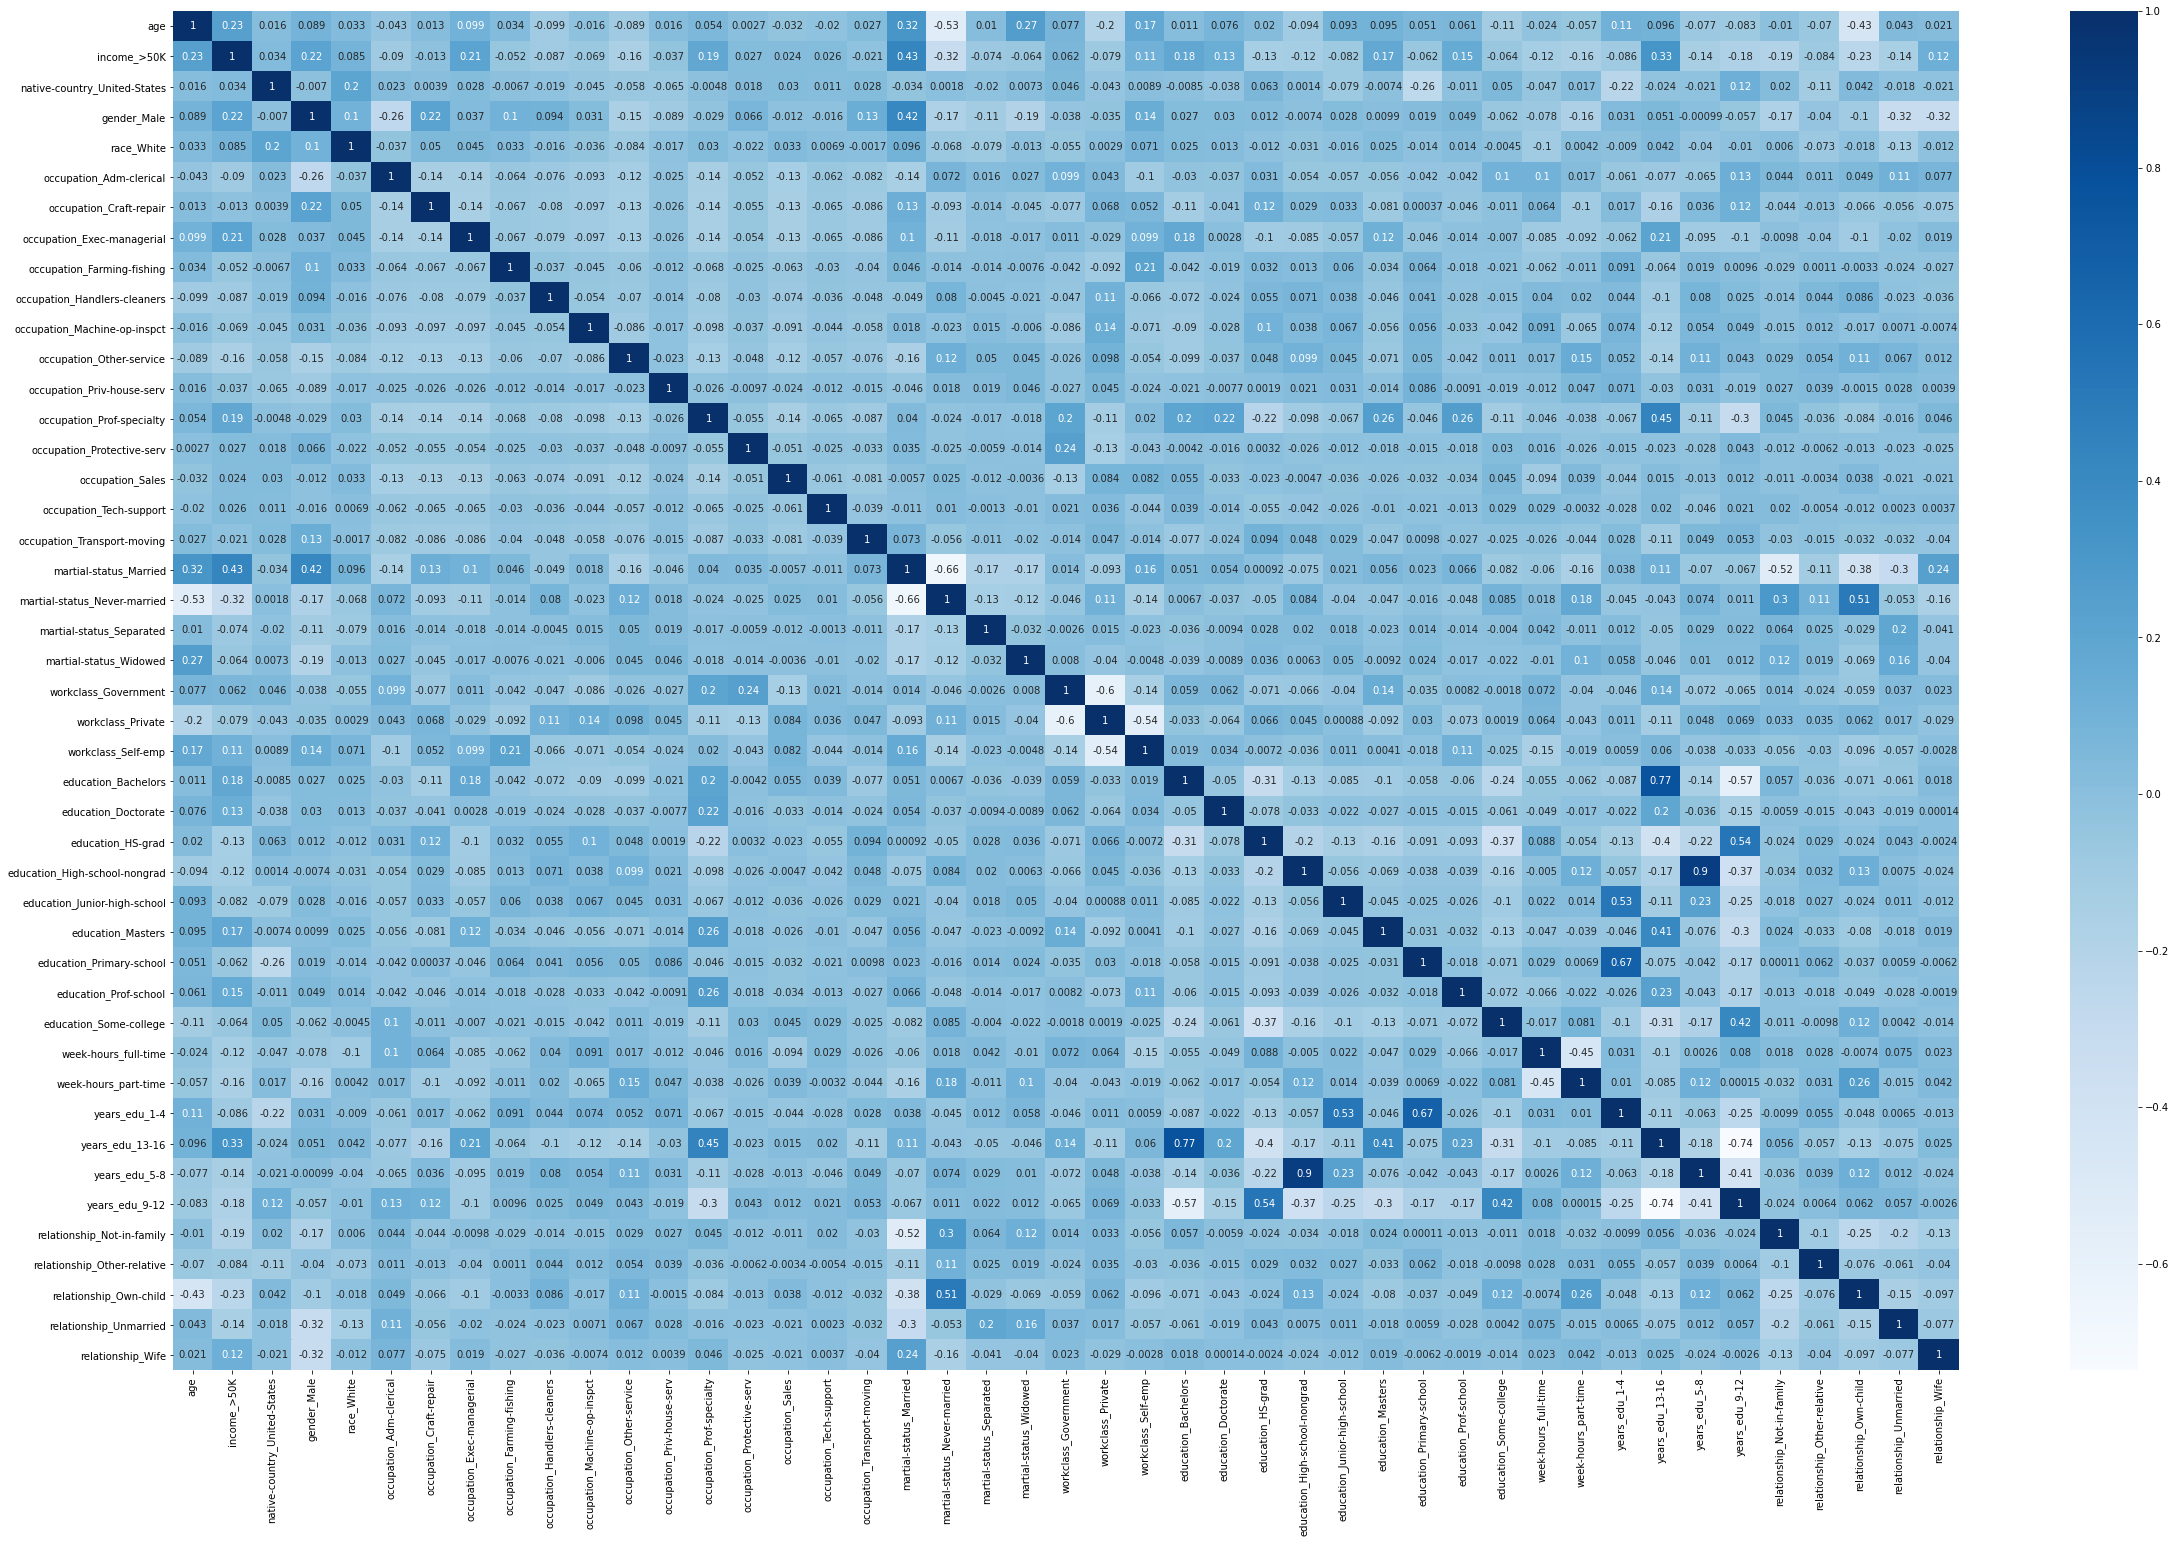

In [ ]:
corr2 = df.corr()

plt.subplots(figsize=(40,25))

sns.heatmap(corr2, 
            annot=True,
            cmap=plt.cm.Blues)

In [ ]:
y = df['income_>50K']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [ ]:
x = df.loc[:,( df.columns != 'income_>50K')]
x.head()

,age,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp,education_Bachelors,education_Doctorate,education_HS-grad,education_High-school-nongrad,education_Junior-high-school,education_Masters,education_Primary-school,education_Prof-school,education_Some-college,week-hours_full-time,week-hours_part-time,years_edu_1-4,years_edu_13-16,years_edu_5-8,years_edu_9-12,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,50,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,38,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
3,53,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state =1)

In [ ]:
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (22792, 44)
x test:  (9769, 44)
y train:  (22792,)
y test:  (9769,)


## Task 4 - Logistic Regression
Train and test a logistic regression model. If you want to get a maximum score you must be sure that your model:
- Do not overfit
- Do not underfit
- Achieves at least 80% accuracy on the test subset.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=900).fit(x_train,y_train)

In [ ]:
print("Train set accuracy: {:.3%}".format(model.score(x_train,y_train)))
print("Test set accuracy: {:.3%}".format(model.score(x_test,y_test)))

Train set accuracy: 83.319%
Test set accuracy: 83.458%


In [ ]:
# def mape(model, X, y):
#     y_pred = model.predict(X)
#     return 100 * np.mean(np.abs(y - y_pred) / y)

In [ ]:
# print ('Train MAPE:', mape(model, x_train, y_train))
# print ('Test MAPE:', mape(model, x_test, y_test))

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=900), x_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.83245614 0.84254386 0.83150505 0.82492321 0.8372093  0.84203598
 0.83413778 0.83501536 0.82580079 0.82185169]
0.832747915752523


## Task 5 - Precision and recall
- Compute precision and recall for your model, for both, train and test subsets.
- Make sure that you understand these metrics, you may be asked to explain the meaning of it.

In [ ]:
base_prd = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

print(accuracy_score(y_test, base_prd))

0.8345787695772341


[[0.86953752 0.30833333]
 [0.13046248 0.69166667]]


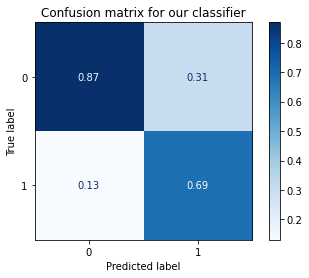

In [ ]:
#Confusion matrix
print(confusion_matrix(y_test, base_prd, normalize='pred'))

matrix = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                normalize='pred')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [ ]:
print(classification_report(y_test, base_prd))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7417
           1       0.69      0.56      0.62      2352

    accuracy                           0.83      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.83      0.83      9769



## Task 6: Applying the model
Use your model to check if you will earn above 50,000$ per year. Check both the response from the model (true/false) and the probability that the response will be true. Check using the data about yourself:
- right now
- two years from now
- ten years from now

In [ ]:
me= {
    'age' : [21, 23, 31], 
    'native-country_United-States' : [0,0,0], 
    'gender_Male' : [0, 0, 0],
    'race_White' : [1, 1, 1], 
    'occupation_Adm-clerical' : [0, 0, 0], 
    'occupation_Craft-repair' : [0, 0, 0],
    'occupation_Exec-managerial' : [0, 0, 0], 
    'occupation_Farming-fishing' : [0, 0, 0],
    'occupation_Handlers-cleaners' : [0, 0, 0], 
    'occupation_Machine-op-inspct' : [0, 0, 0],
    'occupation_Other-service' : [0, 0, 0], 
    'occupation_Priv-house-serv' : [0, 0, 0],
    'occupation_Prof-specialty' : [0, 0, 1], 
    'occupation_Protective-serv' : [0, 0, 0],
    'occupation_Sales' : [0, 0, 0], 
    'occupation_Tech-support' : [1, 1, 0],
    'occupation_Transport-moving' : [0, 0, 0], 
    'martial-status_Married' : [0, 0, 1],
    'martial-status_Never-married' : [1, 1, 0], 
    'martial-status_Separated' : [0, 0, 0],
    'martial-status_Widowed' : [0, 0, 0], 
    'workclass_Government' : [0, 0, 0], 
    'workclass_Private' : [1, 1, 1],
    'workclass_Self-emp' : [0, 0, 0], 
    'education_Bachelors' : [1, 0, 0], 
    'education_Doctorate' : [0, 0, 0],
    'education_HS-grad' : [0, 0, 0], 
    'education_High-school-nongrad' : [0, 0, 0],
    'education_Junior-high-school' : [0, 0, 0], 
    'education_Masters' : [0, 1, 1],
    'education_Primary-school' : [0, 0, 0], 
    'education_Prof-school' : [0, 0, 0],
    'education_Some-college' : [0, 0, 0], 
    'week-hours_full-time' : [0, 1, 1],
    'week-hours_part-time' : [1, 0, 0], 
    'years_edu_1-4' : [0, 0, 0], 
    'years_edu_13-16' : [1, 1, 1],
    'years_edu_5-8' : [0, 0, 0], 
    'years_edu_9-12' : [0, 0, 0], 
    'relationship_Not-in-family' : [0, 0, 0],
    'relationship_Other-relative' : [0, 0, 0], 
    'relationship_Own-child' : [0, 0, 0],
    'relationship_Unmarried' : [1, 1, 0], 
    'relationship_Wife' : [0, 0, 1]
}

df_me = pd.DataFrame.from_dict(me)

df_me.head()

,age,native-country_United-States,gender_Male,race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,martial-status_Married,martial-status_Never-married,martial-status_Separated,martial-status_Widowed,workclass_Government,workclass_Private,workclass_Self-emp,education_Bachelors,education_Doctorate,education_HS-grad,education_High-school-nongrad,education_Junior-high-school,education_Masters,education_Primary-school,education_Prof-school,education_Some-college,week-hours_full-time,week-hours_part-time,years_edu_1-4,years_edu_13-16,years_edu_5-8,years_edu_9-12,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,31,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [ ]:
me_pred = model.predict(df_me)

print(me_pred)

[0 0 1]


In [ ]:
print(model.predict_proba(df_me))

[[0.98402371 0.01597629]
 [0.92379607 0.07620393]
 [0.24350613 0.75649387]]
